In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(1771.3790)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 48


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 682.03392  validloss 1003.36592±0.00000  bestvalidloss 1003.36592  last_update 0
train: iter 1  trainloss 219.36365  validloss 899.99265±0.00000  bestvalidloss 899.99265  last_update 0
train: iter 2  trainloss -14.13473  validloss 758.67945±0.00000  bestvalidloss 758.67945  last_update 0
train: iter 3  trainloss -322.77369  validloss -127.03998±0.00000  bestvalidloss -127.03998  last_update 0
train: iter 4  trainloss -543.87513  validloss -315.40305±0.00000  bestvalidloss -315.40305  last_update 0
train: iter 5  trainloss -726.03220  validloss -514.09119±0.00000  bestvalidloss -514.09119  last_update 0
train: iter 6  trainloss -784.12798  validloss -611.07515±0.00000  bestvalidloss -611.07515  last_update 0
train: iter 7  trainloss -659.49106  validloss -697.26160±0.00000  bestvalidloss -697.26160  last_update 0
train: iter 8  trainloss -942.96487  validloss -719.93590±0.00000  bestvalidloss -719.93590  last_update 0
train: iter 9  trainloss 

train: iter 76  trainloss -1888.96090  validloss -1674.47191±0.00000  bestvalidloss -1699.89441  last_update 9
train: iter 77  trainloss -1880.26901  validloss -1714.00986±0.00000  bestvalidloss -1714.00986  last_update 0
train: iter 78  trainloss -1895.45163  validloss -1489.33383±0.00000  bestvalidloss -1714.00986  last_update 1
train: iter 79  trainloss -1931.57691  validloss -1720.84748±0.00000  bestvalidloss -1720.84748  last_update 0
train: iter 80  trainloss -1965.22980  validloss -1718.64826±0.00000  bestvalidloss -1720.84748  last_update 1
train: iter 81  trainloss -1940.35887  validloss -1744.66918±0.00000  bestvalidloss -1744.66918  last_update 0
train: iter 82  trainloss -1942.31918  validloss -1573.92587±0.00000  bestvalidloss -1744.66918  last_update 1
train: iter 83  trainloss -1979.81920  validloss -1796.67866±0.00000  bestvalidloss -1796.67866  last_update 0
train: iter 84  trainloss -1928.47016  validloss -1788.89837±0.00000  bestvalidloss -1796.67866  last_update 1
t

train: iter 151  trainloss -1964.93866  validloss -1577.67768±0.00000  bestvalidloss -1905.37813  last_update 6
train: iter 152  trainloss -2054.13115  validloss -1862.93017±0.00000  bestvalidloss -1905.37813  last_update 7
train: iter 153  trainloss -2052.31664  validloss -1912.96824±0.00000  bestvalidloss -1912.96824  last_update 0
train: iter 154  trainloss -2036.74040  validloss -1933.37368±0.00000  bestvalidloss -1933.37368  last_update 0
train: iter 155  trainloss -2039.87981  validloss -1906.10079±0.00000  bestvalidloss -1933.37368  last_update 1
train: iter 156  trainloss -2044.07268  validloss -1923.32144±0.00000  bestvalidloss -1933.37368  last_update 2
train: iter 157  trainloss -2000.38577  validloss -1821.53442±0.00000  bestvalidloss -1933.37368  last_update 3
train: iter 158  trainloss -2031.36374  validloss -1892.68667±0.00000  bestvalidloss -1933.37368  last_update 4
train: iter 159  trainloss -1958.40039  validloss -1891.22162±0.00000  bestvalidloss -1933.37368  last_u

train: iter 225  trainloss -2148.65974  validloss -1879.99930±0.00000  bestvalidloss -2019.42379  last_update 23
train: iter 226  trainloss -2074.33439  validloss -1955.66955±0.00000  bestvalidloss -2019.42379  last_update 24
train: iter 227  trainloss -1998.75104  validloss -1854.80893±0.00000  bestvalidloss -2019.42379  last_update 25
train: iter 228  trainloss -2088.54859  validloss -1873.55898±0.00000  bestvalidloss -2019.42379  last_update 26
train: iter 229  trainloss -2145.47979  validloss -1855.02175±0.00000  bestvalidloss -2019.42379  last_update 27
train: iter 230  trainloss -2109.24239  validloss -1890.44620±0.00000  bestvalidloss -2019.42379  last_update 28
train: iter 231  trainloss -2110.10565  validloss -1646.21038±0.00000  bestvalidloss -2019.42379  last_update 29
train: iter 232  trainloss -2020.38390  validloss -1923.94761±0.00000  bestvalidloss -2019.42379  last_update 30
train: iter 233  trainloss -2023.22233  validloss -1567.43646±0.00000  bestvalidloss -2019.42379

train: iter 298  trainloss -2156.83220  validloss -2060.26533±0.00000  bestvalidloss -2070.73804  last_update 5
train: iter 299  trainloss -2133.96638  validloss -2078.26636±0.00000  bestvalidloss -2078.26636  last_update 0
train: iter 300  trainloss -2041.85853  validloss -1895.93429±0.00000  bestvalidloss -2078.26636  last_update 1
train: iter 301  trainloss -2185.80311  validloss -2063.88571±0.00000  bestvalidloss -2078.26636  last_update 2
train: iter 302  trainloss -2149.13371  validloss -2064.55702±0.00000  bestvalidloss -2078.26636  last_update 3
train: iter 303  trainloss -2177.19356  validloss -2057.05426±0.00000  bestvalidloss -2078.26636  last_update 4
train: iter 304  trainloss -2176.57240  validloss -2064.62794±0.00000  bestvalidloss -2078.26636  last_update 5
train: iter 305  trainloss -2172.91975  validloss -2089.09861±0.00000  bestvalidloss -2089.09861  last_update 0
train: iter 306  trainloss -2100.56187  validloss -2067.04096±0.00000  bestvalidloss -2089.09861  last_u

train: iter 372  trainloss -2189.83167  validloss -2104.26921±0.00000  bestvalidloss -2128.90990  last_update 11
train: iter 373  trainloss -2116.94904  validloss -1997.47338±0.00000  bestvalidloss -2128.90990  last_update 12
train: iter 374  trainloss -2169.47184  validloss -1957.89430±0.00000  bestvalidloss -2128.90990  last_update 13
train: iter 375  trainloss -2175.59901  validloss -2111.37259±0.00000  bestvalidloss -2128.90990  last_update 14
train: iter 376  trainloss -2163.83605  validloss -2122.98288±0.00000  bestvalidloss -2128.90990  last_update 15
train: iter 377  trainloss -2197.41066  validloss -2070.57500±0.00000  bestvalidloss -2128.90990  last_update 16
train: iter 378  trainloss -2161.13143  validloss -2091.15804±0.00000  bestvalidloss -2128.90990  last_update 17
train: iter 379  trainloss -2080.69583  validloss -2036.83682±0.00000  bestvalidloss -2128.90990  last_update 18
train: iter 380  trainloss -2195.06313  validloss -2026.74360±0.00000  bestvalidloss -2128.90990

train: iter 445  trainloss -2115.56578  validloss -2097.65093±0.00000  bestvalidloss -2160.95739  last_update 10
train: iter 446  trainloss -2110.50567  validloss -1897.61888±0.00000  bestvalidloss -2160.95739  last_update 11
train: iter 447  trainloss -2163.46763  validloss -2028.10880±0.00000  bestvalidloss -2160.95739  last_update 12
train: iter 448  trainloss -2208.83823  validloss -2139.13089±0.00000  bestvalidloss -2160.95739  last_update 13
train: iter 449  trainloss -2198.31972  validloss -2104.23143±0.00000  bestvalidloss -2160.95739  last_update 14
train: iter 450  trainloss -2202.79197  validloss -2146.87078±0.00000  bestvalidloss -2160.95739  last_update 15
train: iter 451  trainloss -2217.08612  validloss -2132.31467±0.00000  bestvalidloss -2160.95739  last_update 16
train: iter 452  trainloss -2201.94670  validloss -2123.70346±0.00000  bestvalidloss -2160.95739  last_update 17
train: iter 453  trainloss -2102.58678  validloss -2112.77818±0.00000  bestvalidloss -2160.95739

train: iter 518  trainloss -2175.16770  validloss -2093.64701±0.00000  bestvalidloss -2168.88073  last_update 50
train: iter 519  trainloss -2201.49355  validloss -2094.78091±0.00000  bestvalidloss -2168.88073  last_update 51
train: iter 520  trainloss -2225.48952  validloss -2145.32438±0.00000  bestvalidloss -2168.88073  last_update 52
train: iter 521  trainloss -2216.33583  validloss -2172.79704±0.00000  bestvalidloss -2172.79704  last_update 0
train: iter 522  trainloss -2227.34151  validloss -2145.80768±0.00000  bestvalidloss -2172.79704  last_update 1
train: iter 523  trainloss -2215.11893  validloss -2141.95367±0.00000  bestvalidloss -2172.79704  last_update 2
train: iter 524  trainloss -2208.50339  validloss -2140.52512±0.00000  bestvalidloss -2172.79704  last_update 3
train: iter 525  trainloss -2149.77852  validloss -1967.54622±0.00000  bestvalidloss -2172.79704  last_update 4
train: iter 526  trainloss -2160.62890  validloss -2049.70569±0.00000  bestvalidloss -2172.79704  las

train: iter 591  trainloss -2198.86118  validloss -2200.65443±0.00000  bestvalidloss -2200.65443  last_update 0
train: iter 592  trainloss -2205.81354  validloss -2153.83973±0.00000  bestvalidloss -2200.65443  last_update 1
train: iter 593  trainloss -2205.78013  validloss -2117.31196±0.00000  bestvalidloss -2200.65443  last_update 2
train: iter 594  trainloss -2198.55502  validloss -2168.37632±0.00000  bestvalidloss -2200.65443  last_update 3
train: iter 595  trainloss -2162.94713  validloss -2071.47480±0.00000  bestvalidloss -2200.65443  last_update 4
train: iter 596  trainloss -2180.82496  validloss -2165.88754±0.00000  bestvalidloss -2200.65443  last_update 5
train: iter 597  trainloss -2215.77679  validloss -2174.05067±0.00000  bestvalidloss -2200.65443  last_update 6
train: iter 598  trainloss -2208.73276  validloss -2141.26099±0.00000  bestvalidloss -2200.65443  last_update 7
train: iter 599  trainloss -2195.73808  validloss -2047.71173±0.00000  bestvalidloss -2200.65443  last_u

train: iter 664  trainloss -2226.57253  validloss -2147.70820±0.00000  bestvalidloss -2200.65443  last_update 73
train: iter 665  trainloss -2242.33705  validloss -2189.09240±0.00000  bestvalidloss -2200.65443  last_update 74
train: iter 666  trainloss -2228.62498  validloss -2190.04686±0.00000  bestvalidloss -2200.65443  last_update 75
train: iter 667  trainloss -2219.45770  validloss -2165.72397±0.00000  bestvalidloss -2200.65443  last_update 76
train: iter 668  trainloss -2229.96911  validloss -2175.51041±0.00000  bestvalidloss -2200.65443  last_update 77
train: iter 669  trainloss -2230.14344  validloss -2159.57975±0.00000  bestvalidloss -2200.65443  last_update 78
train: iter 670  trainloss -2211.60903  validloss -2188.43558±0.00000  bestvalidloss -2200.65443  last_update 79
train: iter 671  trainloss -2227.02695  validloss -2188.11417±0.00000  bestvalidloss -2200.65443  last_update 80
train: iter 672  trainloss -2219.19868  validloss -2091.12083±0.00000  bestvalidloss -2200.65443

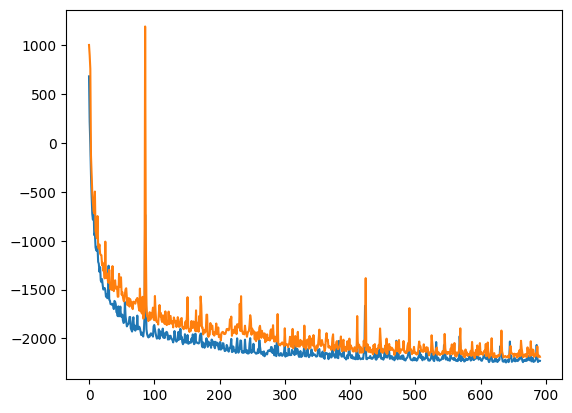

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.13203  validloss 7.46258±0.00000  bestvalidloss 7.46258  last_update 0
train: iter 1  trainloss 6.54064  validloss 6.81418±0.00000  bestvalidloss 6.81418  last_update 0
train: iter 2  trainloss 6.04491  validloss 6.27394±0.00000  bestvalidloss 6.27394  last_update 0
train: iter 3  trainloss 5.63252  validloss 5.82609±0.00000  bestvalidloss 5.82609  last_update 0
train: iter 4  trainloss 5.25744  validloss 5.43858±0.00000  bestvalidloss 5.43858  last_update 0
train: iter 5  trainloss 4.93743  validloss 5.09524±0.00000  bestvalidloss 5.09524  last_update 0
train: iter 6  trainloss 4.65609  validloss 4.77735±0.00000  bestvalidloss 4.77735  last_update 0
train: iter 7  trainloss 4.39796  validloss 4.51505±0.00000  bestvalidloss 4.51505  last_update 0
train: iter 8  trainloss 4.15979  validloss 4.27511±0.00000  bestvalidloss 4.27511  last_update 0
train: iter 9  trainloss 3.94414  validloss 4.02852±0.00000  bestvalidloss 4.02852  last_update 0
train: iter 10  trai

train: iter 89  trainloss -0.42634  validloss -0.44586±0.00000  bestvalidloss -0.44586  last_update 0
train: iter 90  trainloss -0.44775  validloss -0.46214±0.00000  bestvalidloss -0.46214  last_update 0
train: iter 91  trainloss -0.50928  validloss -0.48342±0.00000  bestvalidloss -0.48342  last_update 0
train: iter 92  trainloss -0.52667  validloss -0.51483±0.00000  bestvalidloss -0.51483  last_update 0
train: iter 93  trainloss -0.54062  validloss -0.57754±0.00000  bestvalidloss -0.57754  last_update 0
train: iter 94  trainloss -0.57628  validloss -0.61653±0.00000  bestvalidloss -0.61653  last_update 0
train: iter 95  trainloss -0.60260  validloss -0.61597±0.00000  bestvalidloss -0.61653  last_update 1
train: iter 96  trainloss -0.64854  validloss -0.64927±0.00000  bestvalidloss -0.64927  last_update 0
train: iter 97  trainloss -0.66577  validloss -0.73709±0.00000  bestvalidloss -0.73709  last_update 0
train: iter 98  trainloss -0.67637  validloss -0.69564±0.00000  bestvalidloss -0.7

train: iter 179  trainloss -1.08323  validloss -1.11102±0.00000  bestvalidloss -1.13716  last_update 43
train: iter 180  trainloss -1.05697  validloss -1.07364±0.00000  bestvalidloss -1.13716  last_update 44
train: iter 181  trainloss -1.01393  validloss -1.13976±0.00000  bestvalidloss -1.13976  last_update 0
train: iter 182  trainloss -1.03397  validloss -1.08090±0.00000  bestvalidloss -1.13976  last_update 1
train: iter 183  trainloss -1.03355  validloss -1.01135±0.00000  bestvalidloss -1.13976  last_update 2
train: iter 184  trainloss -1.00996  validloss -1.15230±0.00000  bestvalidloss -1.15230  last_update 0
train: iter 185  trainloss -1.08979  validloss -0.99547±0.00000  bestvalidloss -1.15230  last_update 1
train: iter 186  trainloss -1.07898  validloss -0.95765±0.00000  bestvalidloss -1.15230  last_update 2
train: iter 187  trainloss -1.08682  validloss -1.02124±0.00000  bestvalidloss -1.15230  last_update 3
train: iter 188  trainloss -1.01749  validloss -1.01442±0.00000  bestva

train: iter 258  trainloss -0.98037  validloss -0.95724±0.00000  bestvalidloss -1.15404  last_update 26
train: iter 259  trainloss -1.03880  validloss -1.03352±0.00000  bestvalidloss -1.15404  last_update 27
train: iter 260  trainloss -1.01767  validloss -1.02736±0.00000  bestvalidloss -1.15404  last_update 28
train: iter 261  trainloss -0.99775  validloss -1.04361±0.00000  bestvalidloss -1.15404  last_update 29
train: iter 262  trainloss -1.01995  validloss -1.11689±0.00000  bestvalidloss -1.15404  last_update 30
train: iter 263  trainloss -1.01896  validloss -0.98351±0.00000  bestvalidloss -1.15404  last_update 31
train: iter 264  trainloss -1.02611  validloss -1.08362±0.00000  bestvalidloss -1.15404  last_update 32
train: iter 265  trainloss -1.04683  validloss -1.05430±0.00000  bestvalidloss -1.15404  last_update 33
train: iter 266  trainloss -1.03576  validloss -0.93309±0.00000  bestvalidloss -1.15404  last_update 34
train: iter 267  trainloss -1.01193  validloss -1.06042±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-1.1154, -3.1557, -2.8420, -4.9065], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 116.12478  validloss 122.45556±0.00000  bestvalidloss 122.45556  last_update 0
train: iter 1  trainloss 86.96439  validloss 97.53002±0.00000  bestvalidloss 97.53002  last_update 0
train: iter 2  trainloss 64.16767  validloss 69.67127±0.00000  bestvalidloss 69.67127  last_update 0
train: iter 3  trainloss 50.19860  validloss 53.10220±0.00000  bestvalidloss 53.10220  last_update 0
train: iter 4  trainloss 39.81741  validloss 41.64225±0.00000  bestvalidloss 41.64225  last_update 0
train: iter 5  trainloss 31.68016  validloss 32.88612±0.00000  bestvalidloss 32.88612  last_update 0
train: iter 6  trainloss 25.24200  validloss 26.10964±0.00000  bestvalidloss 26.10964  last_update 0
train: iter 7  trainloss 20.07032  validloss 20.72019±0.00000  bestvalidloss 20.72019  last_update 0
train: iter 8  trainloss 15.87216  validloss 16.34154±0.00000  bestvalidloss 16.34154  last_update 0
train: iter 9  trainloss 12.51997  validloss 12.88370±0.00000  bestvalidloss 12.88370  l

train: iter 83  trainloss 0.73969  validloss 1.36192±0.00000  bestvalidloss 1.29577  last_update 3
train: iter 84  trainloss 0.75720  validloss 1.26039±0.00000  bestvalidloss 1.26039  last_update 0
train: iter 85  trainloss 0.73268  validloss 1.30362±0.00000  bestvalidloss 1.26039  last_update 1
train: iter 86  trainloss 0.73785  validloss 1.33378±0.00000  bestvalidloss 1.26039  last_update 2
train: iter 87  trainloss 0.73520  validloss 1.33302±0.00000  bestvalidloss 1.26039  last_update 3
train: iter 88  trainloss 0.73945  validloss 1.31529±0.00000  bestvalidloss 1.26039  last_update 4
train: iter 89  trainloss 0.72209  validloss 1.26006±0.00000  bestvalidloss 1.26006  last_update 0
train: iter 90  trainloss 0.77104  validloss 1.33917±0.00000  bestvalidloss 1.26006  last_update 1
train: iter 91  trainloss 0.73382  validloss 1.24629±0.00000  bestvalidloss 1.24629  last_update 0
train: iter 92  trainloss 0.71939  validloss 1.30589±0.00000  bestvalidloss 1.24629  last_update 1
train: ite

train: iter 167  trainloss 0.71459  validloss 1.27520±0.00000  bestvalidloss 1.20866  last_update 47
train: iter 168  trainloss 0.72325  validloss 1.30591±0.00000  bestvalidloss 1.20866  last_update 48
train: iter 169  trainloss 0.71296  validloss 1.31200±0.00000  bestvalidloss 1.20866  last_update 49
train: iter 170  trainloss 0.71765  validloss 1.29950±0.00000  bestvalidloss 1.20866  last_update 50
train: iter 171  trainloss 0.72592  validloss 1.27606±0.00000  bestvalidloss 1.20866  last_update 51
train: iter 172  trainloss 0.71011  validloss 1.24297±0.00000  bestvalidloss 1.20866  last_update 52
train: iter 173  trainloss 0.71792  validloss 1.26156±0.00000  bestvalidloss 1.20866  last_update 53
train: iter 174  trainloss 0.70084  validloss 1.27145±0.00000  bestvalidloss 1.20866  last_update 54
train: iter 175  trainloss 0.73246  validloss 1.23811±0.00000  bestvalidloss 1.20866  last_update 55
train: iter 176  trainloss 0.71930  validloss 1.28607±0.00000  bestvalidloss 1.20866  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-12.0195)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.7195)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.07698666314332152
tensor([1.3300])
